# K-Means
The **KMeans** algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.
The k-means algorithm divides a set of **N** samples **X** into **K** disjoint clusters , each described by the mean $\mu_j$ of the samples in the cluster. The means are commonly called the cluster “centroids”.
The **K-means** algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion:
$$\sum_{i=0}^n min_{\mu_j\in C}(\parallel x_i - \mu_j \parallel)^2$$

In [51]:
import math
import random
import numpy as np
from sklearn import datasets,cluster
import matplotlib.pyplot as plt

In [52]:
iris = datasets.load_iris()
X = iris.data
labels = iris.target
X,labels

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

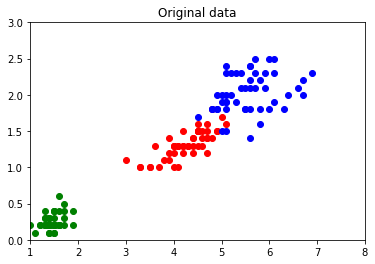

In [53]:
# visualize data distribution
data = X[:,2:]
c1 = data[np.where(labels==0)]
c2 = data[np.where(labels==1)]
c3 = data[np.where(labels==2)]

plt.scatter(c1[:,0], c1[:,1], color='green')
plt.scatter(c2[:,0], c2[:,1], color='red')
plt.scatter(c3[:,0], c3[:,1], color='blue')
plt.title('Original data')
plt.xlim(1, 8)
plt.ylim(0, 3)
plt.show()

In [54]:
# using sklearn:https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
kmeans = cluster.KMeans(n_clusters=3, max_iter=100).fit(data)
output = kmeans.labels_
centers = kmeans.cluster_centers_
output, centers

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([[5.59583333, 2.0375    ],
        [1.462     , 0.246     ],
        [4.26923077, 1.34230769]]))

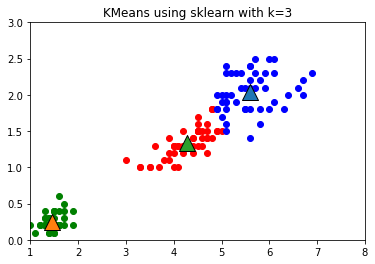

In [55]:
# visualize result

c1_ = data[output == 1]
c2_ = data[output == 2]
c3_ = data[output == 0]
        
plt.scatter(c1_[:,0], c1_[:,1], color='green')
plt.scatter(c2_[:,0], c2_[:,1], color='red')
plt.scatter(c3_[:,0], c3_[:,1], color='blue')

for ix, p in enumerate(centers):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)

plt.title('KMeans using sklearn with k=3')
plt.xlim(1, 8)
plt.ylim(0, 3)
plt.show()

In [57]:
output = (output + 1 ) % 3
output

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [59]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels, output)
print("The accuracy of your model is {}".format(acc))

The accuracy of your model is 0.96
